In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df =pd.read_csv("/content/Data_problem 1.csv")
df.head(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
print(df.columns)
print(df.shape)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
(8950, 18)


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print("null values")
df.isnull().sum()


null values


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
print("unique values")
df.nunique()

unique values


CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
df["CREDIT_LIMIT"].dtypes

dtype('float64')

In [ ]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(),inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df1=df.copy()

In [ ]:
df1.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
df1.drop(["CUST_ID"],axis=1,inplace=True)

In [ ]:
df1.shape

(8950, 17)

In [ ]:
knn_ = KMeans(n_clusters=3,random_state=42)
knn_.fit(df1)
pd.Series(knn_.labels_).value_counts()

1    6526
2    2293
0     131
dtype: int64

In [ ]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in range(1,21):
    clusters = KMeans( num_clusters )
    clusters.fit( df1 )
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,3.931530e+11
1,2,2.793412e+11
2,3,2.328418e+11
3,4,2.068481e+11
4,5,1.822803e+11
5,6,1.628828e+11
6,7,1.452144e+11
7,8,1.328786e+11
8,9,1.241687e+11
9,10,1.161548e+11


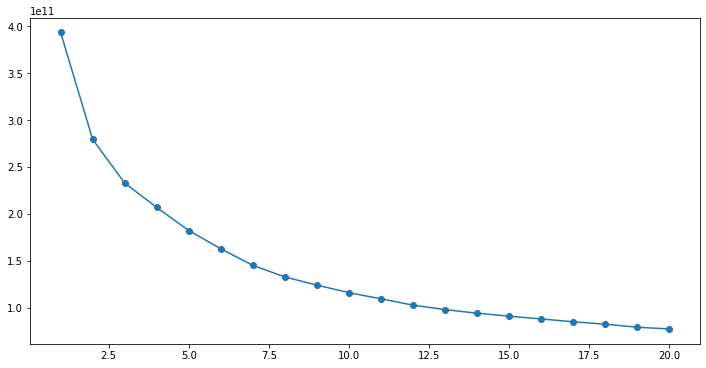

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent”
KPIs such as:

1. Monthly average purchase and cash advance amount
2. Purchases by type (one-off, installments)
3. Average amount per purchase and cash advance transaction,
4. Limit usage (balance to credit limit ratio),
5. Payments to minimum payments ratio etc (think of more types of similar analysis)

In [ ]:
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
df1["monthly_purchase_avg"] = df1["PURCHASES"]/df1["TENURE"]

In [ ]:
df1["cash_advance_amt"] = df1["CASH_ADVANCE"]/df1["TENURE"]

In [ ]:
df1["avg_amt_per_purchase"] = df1["PURCHASES"]/df1["PURCHASES_TRX"]
df1["avg_amt_per_purchase"].fillna(0,inplace=True)
df1["avg_amt_per_purchase"].head()

0      47.700000
1       0.000000
2      64.430833
3    1499.000000
4      16.000000
Name: avg_amt_per_purchase, dtype: float64

In [ ]:
df1["avg_cash_advanced_transactions"]  = df1["CASH_ADVANCE"]/df1["CASH_ADVANCE_TRX"]
df1["avg_cash_advanced_transactions"].fillna(0,inplace=True)
df1["avg_cash_advanced_transactions"].head()


0       0.000000
1    1610.736371
2       0.000000
3     205.788017
4       0.000000
Name: avg_cash_advanced_transactions, dtype: float64

In [ ]:
df1["limit_usage"] = df1["BALANCE"]/df1["CREDIT_LIMIT"]
df1["limit_usage"].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

payment to min payment ratio

In [ ]:
df1["payment_to_minpay"] = df1["PAYMENTS"]/df1["MINIMUM_PAYMENTS"]
df1["payment_to_minpay"].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_to_minpay, dtype: float64

In [ ]:
print(df1.shape)
print(df1.columns)
#print(df1.isnull().sum())
df1.head()


(8950, 23)
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'monthly_purchase_avg', 'cash_advance_amt',
       'avg_amt_per_purchase', 'avg_cash_advanced_transactions', 'limit_usage',
       'payment_to_minpay'],
      dtype='object')


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_purchase_avg,cash_advance_amt,avg_amt_per_purchase,avg_cash_advanced_transactions,limit_usage,payment_to_minpay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,47.700000,0.000000,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.000000,1610.736371,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,64.430833,0.000000,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,1499.000000,205.788017,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.000000,0.000000,0.681429,2.771075


there are 2 categories of payments find out in initial observation
1. installments payments
2. oneoff payments(whole payment at one time)

In [ ]:
df1[(df1["INSTALLMENTS_PURCHASES"]>0)].shape

(5034, 23)

In [ ]:
df1[(df1["ONEOFF_PURCHASES"]>0)].shape

(4648, 23)

In [ ]:
for i in range(len(df1["INSTALLMENTS_PURCHASES"])):
  if df1["INSTALLMENTS_PURCHASES"][i]==0:
    df1["installment"][i]=0
  else:
    df1["installment"][i]=1


In [ ]:
df1["one_off"]=0

In [ ]:
for i in range(len(df1["ONEOFF_PURCHASES"])):
  if df1["ONEOFF_PURCHASES"][i]==0:
    df1["one_off"][i]=0
  else:
    df1["one_off"][i]=1

In [ ]:
df1["installment"].value_counts()

1    5034
0    3916
Name: installment, dtype: int64

In [ ]:
df1["one_off"].value_counts()

1    4648
0    4302
Name: one_off, dtype: int64

In [ ]:
df1.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_purchase_avg,cash_advance_amt,avg_amt_per_purchase,avg_cash_advanced_transactions,limit_usage,payment_to_minpay,installment,one_off
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,47.700000,0.000000,0.040901,1.446508,1,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.000000,1610.736371,0.457495,3.826241,0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,64.430833,0.000000,0.332687,0.991682,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,1499.000000,205.788017,0.222223,0.000000,0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.000000,0.000000,0.681429,2.771075,0,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,166.660000,0.000000,1.005460,0.581601,1,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000,110.797031,0.000000,0.046464,32.081820,1,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,36.350000,0.000000,36.350000,0.000000,0.792892,1.276357,1,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000,172.298000,0.000000,0.144989,2.206280,1,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,106.800000,0.000000,427.200000,0.000000,0.013839,11.612605,0,1


Text(0, 0.5, 'installment')

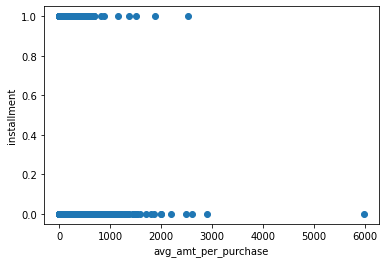

In [106]:
plt.scatter(df1['avg_amt_per_purchase'], df1['installment'])
plt.xlabel('avg_amt_per_purchase')
plt.ylabel('installment')

In [99]:
df2=df.copy()
df2.drop(["CUST_ID"],axis=1,inplace=True)
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


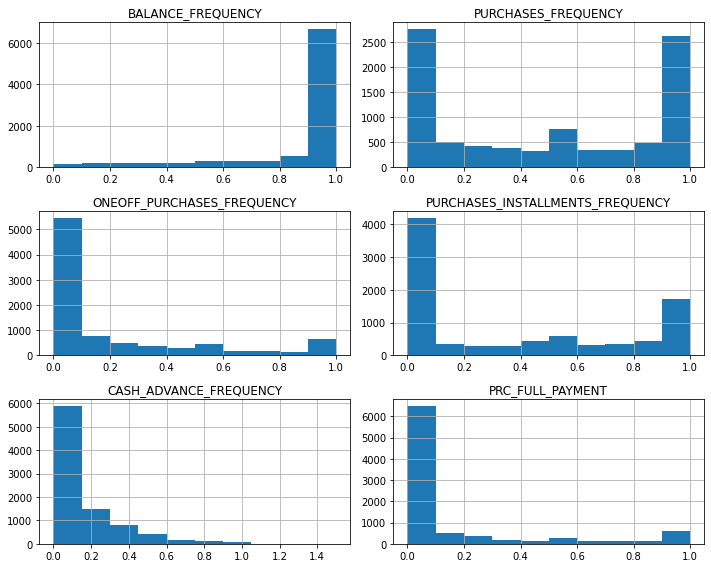

In [102]:
columns=['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']
df2[columns].hist(figsize=(10,8))
plt.tight_layout()

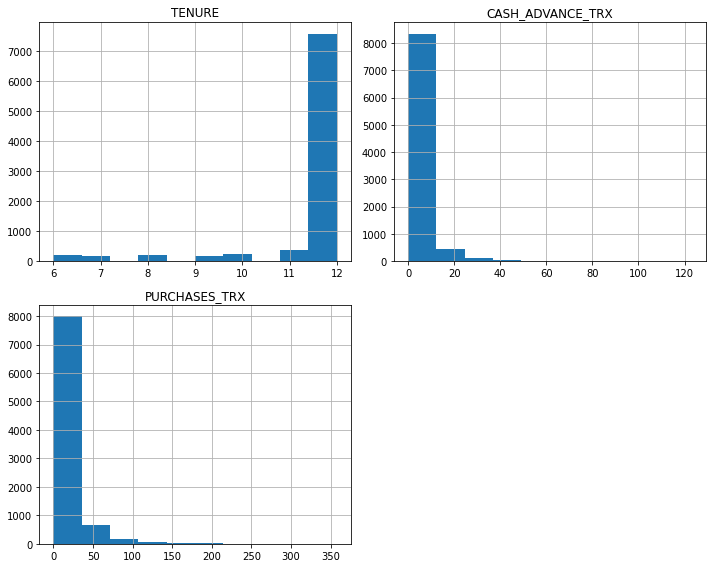

In [103]:
df2[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

In [ ]:
# plt.figure(figsize=(20,35))
# plt.subplot(2,2,1)
# plt.boxplot(df2[columns])
# # for i in range(0,len(columns)):
# #     plt.subplot(6, 3, i+1)
# #     plt.boxplot(df2.columns[i])
# #     plt.title(df2.columns[i])

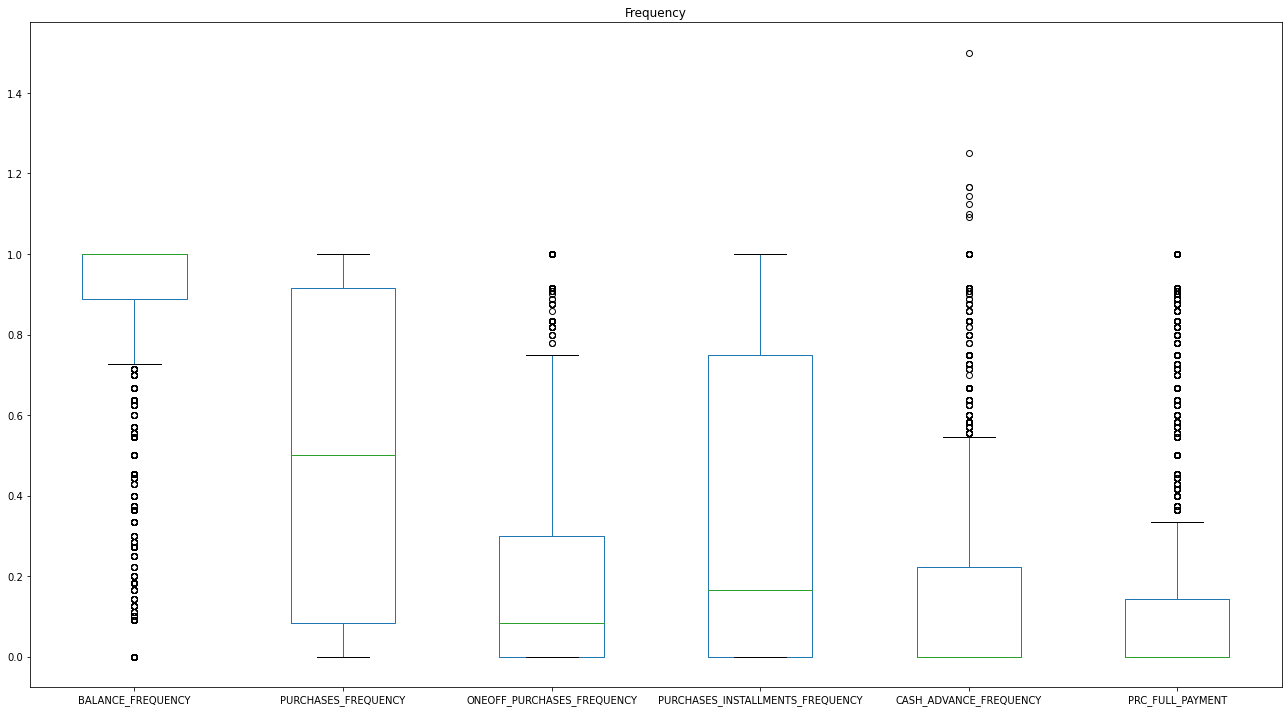

In [113]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

to deal with the outliers we'll use log transform

Text(0.5, 1.0, 'Correlation Matrix')

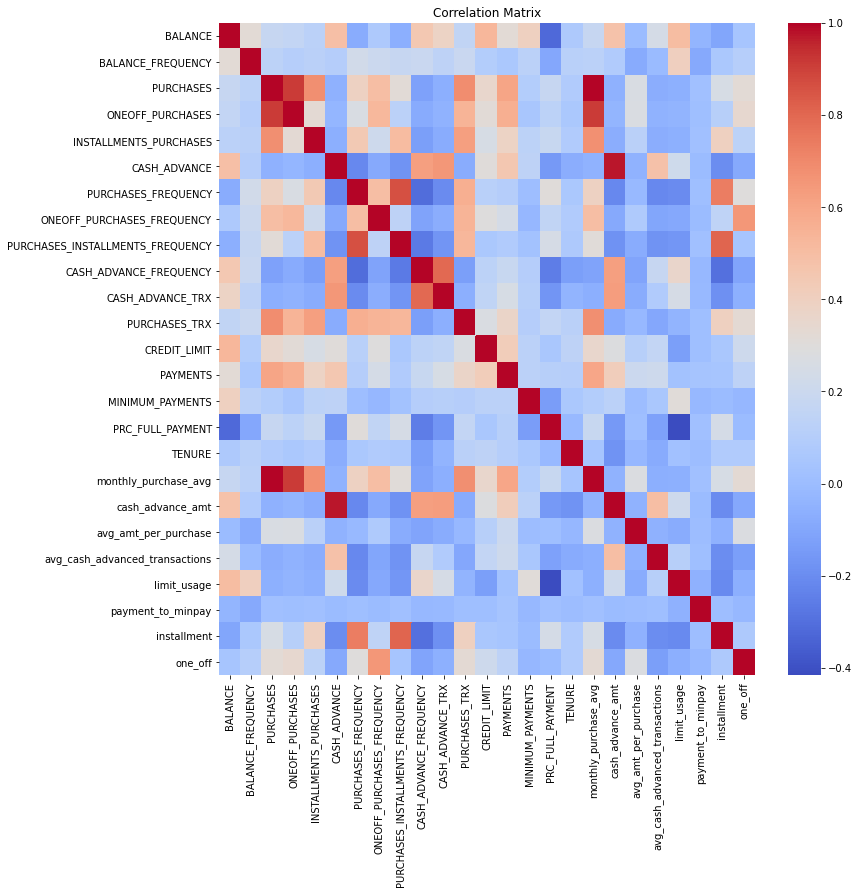

In [98]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

In [114]:
# log tranformation
df_log_=df2.applymap(lambda x: np.log(x+1))
df_log_.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


In [115]:
df_log_.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [116]:
df_log_.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [118]:
df_log_.skew()

BALANCE                            -0.861021
BALANCE_FREQUENCY                  -2.285534
PURCHASES                          -0.764492
ONEOFF_PURCHASES                    0.185854
INSTALLMENTS_PURCHASES             -0.024981
CASH_ADVANCE                        0.262594
PURCHASES_FREQUENCY                -0.089637
ONEOFF_PURCHASES_FREQUENCY          1.290617
PURCHASES_INSTALLMENTS_FREQUENCY    0.373620
CASH_ADVANCE_FREQUENCY              1.455462
CASH_ADVANCE_TRX                    0.940131
PURCHASES_TRX                       0.032697
CREDIT_LIMIT                       -0.101564
PAYMENTS                           -1.778312
MINIMUM_PAYMENTS                    0.269703
PRC_FULL_PAYMENT                    1.746046
TENURE                             -3.170222
dtype: float64

In [119]:
np.any(np.isnan(df_log_))

False

In [120]:
np.all(np.isfinite(df_log_))

True

In [121]:
df_log_ = df_log_.reset_index()

In [122]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_log_)
df_scaled

array([[-1.73185729, -1.20521818, -0.14875746, ..., -0.82984142,
        -0.5563681 ,  0.34726215],
       [-1.73147024,  0.94891762,  0.17961568, ...,  0.90818413,
         0.39195795,  0.34726215],
       [-1.73108319,  0.82499258,  0.49271003, ...,  0.45040683,
        -0.5563681 ,  0.34726215],
       ...,
       [ 1.73108319, -1.4738341 , -0.09290575, ..., -1.27554159,
         0.49816074, -4.40142479],
       [ 1.73147024, -1.73377525, -0.09290575, ..., -1.60473686,
         0.49816074, -4.40142479],
       [ 1.73185729, -0.11830096, -0.73437135, ..., -1.21740725,
        -0.5563681 , -4.40142479]])

In [123]:
from sklearn.decomposition import PCA


In [124]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    c=pc.fit(df_scaled)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [125]:
var_ratio

{2: 0.5382700937523085,
 3: 0.6316650548613434,
 4: 0.70347223207385,
 5: 0.7687505874738807,
 6: 0.8205543398322799,
 7: 0.8648997418212199,
 8: 0.8992379544699677,
 9: 0.9267567173763329,
 10: 0.9504706302262167,
 11: 0.9650267205431134,
 12: 0.9753350438153965,
 13: 0.9830751489257259,
 14: 0.9887368562689582,
 15: 0.9937815452283365,
 16: 0.9963355034168554,
 17: 0.9986267987764023}

lets take p class =8

In [128]:
pc=PCA(n_components=8)
df_final=pc.fit_transform(df_scaled)
df_final

array([[-0.23623632, -2.32022801, -0.45598433, ...,  0.63880041,
         0.51307644,  1.56715349],
       [-3.4507945 ,  1.35225237, -0.61233244, ..., -0.1308651 ,
         1.01071295,  0.12771959],
       [ 1.50767   ,  1.6117384 , -3.01688083, ...,  0.41240251,
         0.79250643,  0.44496308],
       ...,
       [ 1.01708522, -3.58338179,  2.39194721, ...,  0.49703957,
         2.49409666, -0.86568341],
       [-2.83611424, -4.17363822,  1.21608808, ..., -0.32927057,
         2.32107047,  0.03467453],
       [-0.14423092, -0.9138847 , -0.18395479, ...,  0.95117424,
         1.08388394, -0.32498512]])

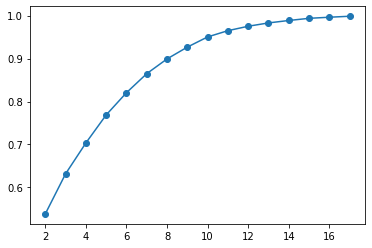

In [129]:
pd.Series(var_ratio).plot(marker="o")

In [130]:
from sklearn.cluster import KMeans
no_cluster = range( 1, 21 )
errors = []

for i in no_cluster:
    clusters = KMeans( i )
    clusters.fit( df_final )
    errors.append( clusters.inertia_ )

In [132]:
clus_df = pd.DataFrame( { "number":no_cluster, "errors": errors } )

clus_df[0:21]

,number,errors
0,1,144867.234465
1,2,105101.186236
2,3,87119.380168
3,4,77890.358821
4,5,69159.710986
5,6,63266.922051
6,7,59261.867336
7,8,55924.591592
8,9,53020.516283
9,10,50511.428068


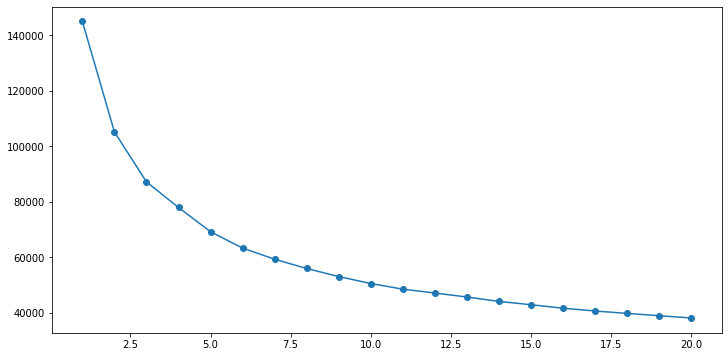

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clus_df.number, clus_df.errors, marker = "o" )

from elbow method num of cluster =3

In [136]:
kmean = KMeans( n_clusters=3)
kmean.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
labels=kmean.labels_

In [ ]:
labels=pd.Series(data=labels)
labels.head(10)

Text(0, 0.5, 'PC_1')

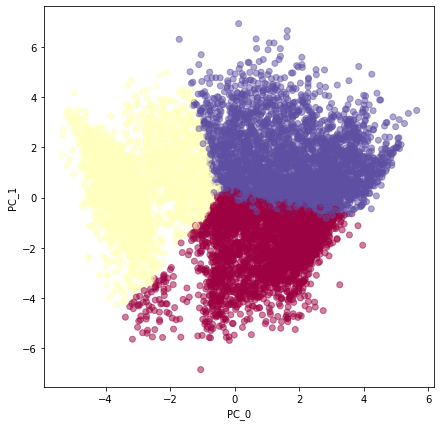

In [140]:
plt.figure(figsize=(7,7))
plt.scatter(df_final[:,0],df_final[:,1],c=labels,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [143]:
labels_num=list() #Extracting the various clusters formed
for i in range(10):
    labels_num.append(labels[labels.values==i])

In [145]:
df_final=pd.DataFrame(df_final)
df_final.head()

,0,1,2,3,4,5,6,7
0,-0.236236,-2.320228,-0.455984,-1.521339,-0.287017,0.638800,0.513076,1.567153
1,-3.450794,1.352252,-0.612332,-1.258875,1.775814,-0.130865,1.010713,0.127720
2,1.507670,1.611738,-3.016881,-0.422552,-1.018588,0.412403,0.792506,0.444963
3,-1.245699,-0.706589,-2.424076,-0.359894,-1.033191,3.009970,0.006909,1.131573
4,-1.124680,-0.997548,-1.543122,-1.611088,-0.874310,-0.423917,1.080441,1.185569


In [154]:
cluster_1=df.iloc[labels_x[0].index,:]
cluster_2  =df.iloc[labels_x[1].index,:]
cluster_3 =df.iloc[labels_x[2].index,:]
print(cluster_1.shape)

(2868, 18)


In [155]:
print(cluster_2.shape)
cluster_3.shape

(2848, 18)


(3234, 18)

In [156]:
cluster_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,219.921401,0.721090,467.518717,160.212838,307.701792,35.962209,0.541511,0.076830,0.449530,0.009812,0.140516,8.653068,3196.795132,695.971534,230.371992,0.271101,11.379010
std,385.879822,0.315131,503.400054,370.679348,423.978907,196.417667,0.347831,0.145692,0.382443,0.040159,0.648137,8.318767,2742.613890,1281.764230,494.557003,0.358158,1.519667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,17.903070,0.454545,139.415000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,3.000000,1200.000000,196.713668,102.664936,0.000000,12.000000
50%,56.103919,0.833333,311.675000,0.000000,177.880000,0.000000,0.500000,0.000000,0.416667,0.000000,0.000000,7.000000,2500.000000,401.522123,159.036061,0.000000,12.000000
75%,189.498135,1.000000,600.337500,139.550000,419.077500,0.000000,0.916667,0.083333,0.833333,0.000000,0.000000,12.000000,4000.000000,785.175842,210.937093,0.500000,12.000000
max,3215.903805,1.000000,5252.040000,4440.800000,3520.000000,4158.990631,1.000000,1.000000,1.000000,0.666667,14.000000,88.000000,23000.000000,29272.486070,13564.391210,1.000000,12.000000


In [157]:
cluster_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,2339.594835,0.918865,93.898746,77.556938,16.384529,2125.733120,0.065742,0.040535,0.023078,0.292608,7.030197,1.031601,4258.048178,1731.795347,1070.422813,0.032533,11.349368
std,2195.692073,0.181821,258.674510,240.575161,100.525414,2556.994635,0.135718,0.090375,0.094565,0.213733,8.861210,2.312073,3362.980219,2722.836649,2515.904789,0.101058,1.522040
min,1.691842,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,8.561540,0.000000,6.000000
25%,907.906590,1.000000,0.000000,0.000000,0.000000,436.859463,0.000000,0.000000,0.000000,0.125000,2.000000,0.000000,1600.000000,398.663096,299.929666,0.000000,12.000000
50%,1598.609185,1.000000,0.000000,0.000000,0.000000,1347.773572,0.000000,0.000000,0.000000,0.250000,4.000000,0.000000,3000.000000,831.971581,521.046340,0.000000,12.000000
75%,3020.160714,1.000000,63.440000,0.000000,0.000000,2845.776419,0.083333,0.000000,0.000000,0.416667,9.000000,1.000000,6000.000000,1854.802181,1089.357368,0.000000,12.000000
max,16304.889250,1.000000,3191.000000,3191.000000,3000.000000,26194.049540,1.000000,0.857143,0.888889,1.500000,123.000000,32.000000,19000.000000,34107.074990,61031.618600,1.000000,12.000000


In [158]:
cluster_3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000
mean,2074.257588,0.979146,2279.040182,1429.171889,850.310309,805.092429,0.818909,0.456464,0.589590,0.107623,2.675325,32.126778,5853.430096,2654.124294,1191.293914,0.156331,11.787879
std,2285.332509,0.068038,3121.174860,2520.734801,1325.049832,2098.719554,0.230835,0.344549,0.374016,0.180727,6.156961,33.815524,4077.623290,3662.170737,2961.849295,0.298168,0.868831
min,12.423203,0.272727,8.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000,3.197940,0.000000,6.000000
25%,510.567693,1.000000,735.320000,232.260000,132.580000,0.000000,0.666667,0.166667,0.250000,0.000000,0.000000,12.000000,2500.000000,855.382496,208.601691,0.000000,12.000000
50%,1300.499057,1.000000,1427.060000,772.885000,467.280000,0.000000,0.916667,0.416667,0.666667,0.000000,0.000000,22.000000,5000.000000,1605.356450,504.886630,0.000000,12.000000
75%,2762.906983,1.000000,2659.995000,1661.447500,1085.670000,773.188127,1.000000,0.750000,1.000000,0.166667,3.000000,39.000000,8000.000000,3018.497577,1150.768557,0.125000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


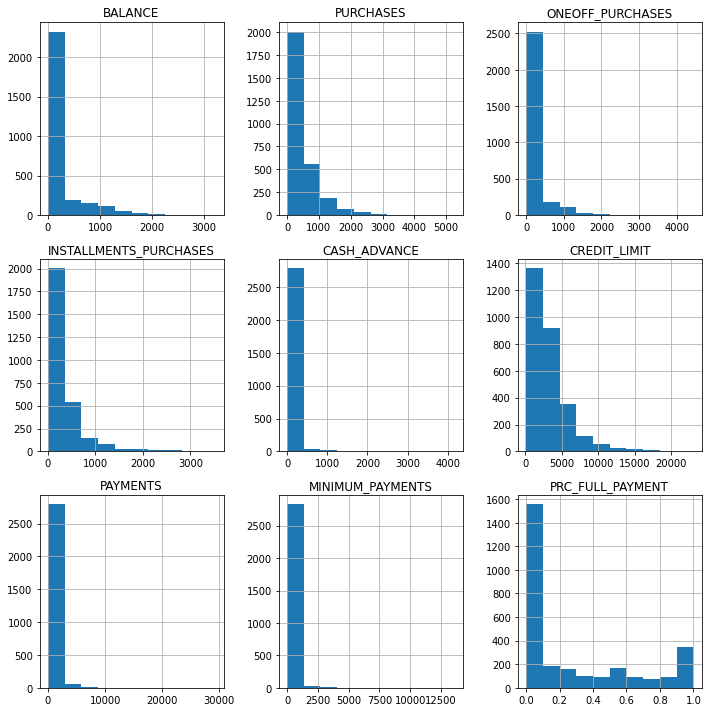

In [160]:
cluster_1[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

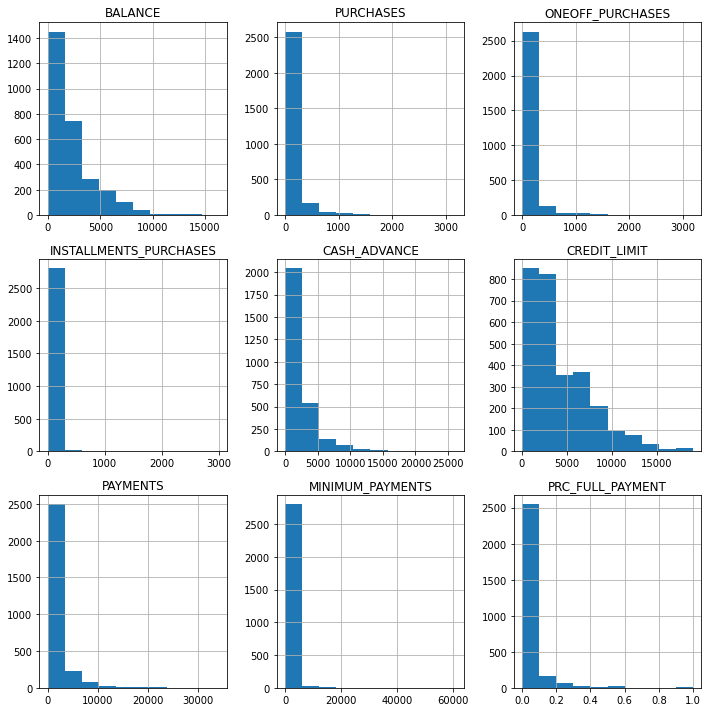

In [162]:
cluster_2[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

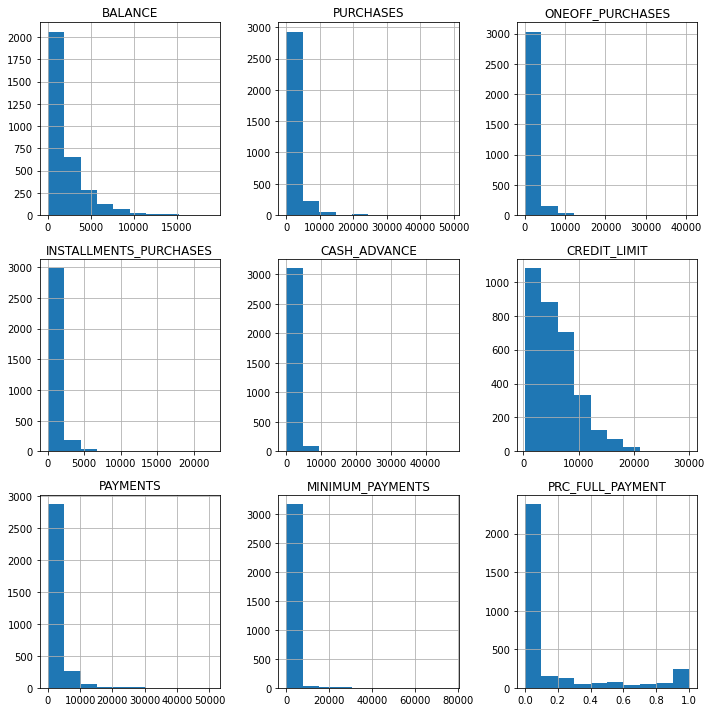

In [161]:
cluster_3[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

There are three clusters

cluster1- 32% of total customers
1. High balence
2. purchase =low
3. credit limit =high
4. less no of one_off payments



cluster2 - 31% of total customers
1. balence  =low
2. purchase = high
3. credit limit = low
4. higher no of one off payemnt



cluster3 - 36% of total customers
1. balence =medium
2. purchase =high
3. credit limit =medium
4. higher num of one_off payments




